Data Set Information:

Occupancy rates (8:00 to 16:30) from 2016/10/04 to 2016/12/19


Attribute Information:

1. SystemCodeNumber: Car park ID
2. Capacity: Car park capacity
3. Occupancy: Car park occupancy rate
4. LastUpdated: Date and Time of the measure


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics, linear_model

from sklearn.model_selection import train_test_split

sns.set()
warnings.simplefilter("ignore")

In [15]:
url = "header_iris.csv"
# headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, skiprows=0, names=headers)

In [16]:
data.columns = data.iloc[0,:]
data.drop(0, inplace=True)

In [17]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
# def load_data():
#     url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip"
#     data = pd.read_csv(url, compression="zip", skiprows=0, header=0, sep=",")
#     X = data[['Capacity']]
#     Y = data[['Occupancy']]
#     data.drop(columns=["LastUpdated"], inplace=True)
#     return X, Y, data

In [23]:
# X, Y, data = load_data()

In [26]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
data['Species']= label_encoder.fit_transform(data['Species']) 

In [27]:
X =data[["Species"]]
Y=data[["SepalLengthCm"]]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80)
lr = linear_model.LinearRegression().fit(X_train,y_train)

In [124]:
# lr = linear_model.LinearRegression().fit(X,Y)

In [29]:
lr.coef_

array([[0.76972458]])

In [30]:
lr.predict(np.array([[4000]]))

array([[3083.91575537]])

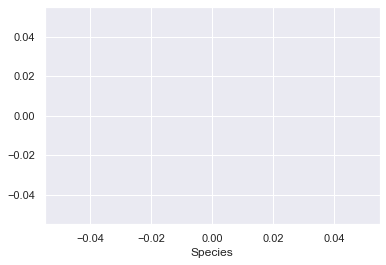

In [34]:
sns.scatterplot(data["Species"])
plt.savefig('scp-1', dpi=500)

TypeError: can't multiply sequence by non-int of type 'float'

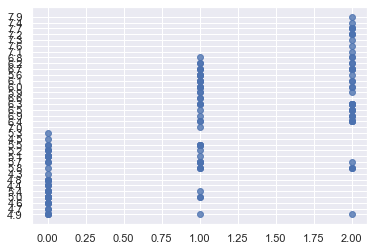

In [33]:
sns.regplot(x=X,y=Y)

In [133]:
lr2 = linear_model.LinearRegression().fit(X, data[['temp', 'atemp', 'hum', 'windspeed']])

In [134]:
lr2.coef_

array([[ 5.92931677e-05],
       [ 5.30862080e-05],
       [-7.40069336e-06],
       [-9.38293952e-06]])

In [137]:
lr2.predict(np.array([[4000]]))

array([[0.46548035, 0.44758002, 0.63162659, 0.19521849]])

In [132]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [35]:
# Import Dataset from sklearn
from sklearn.datasets import load_iris
# Load Iris Data
iris = load_iris()
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [36]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)
# Variables
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']

# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.70, random_state= 101)

# Instantiating LinearRegression() Model
lr = linear_model.LinearRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.25161829999415974
Mean Squared Error: 0.09747027209740512
Mean Root Squared Error: 0.3122022935492389


In [61]:
iris_df.loc[2]

sepal length (cm)    4.7
sepal width (cm)     3.2
petal length (cm)    1.3
petal width (cm)     0.2
species              0.0
Name: 2, dtype: float64

In [64]:
pred = lr.predict(X_test)
print('Predicted Sepal Length (cm):', pred[2])
print('Actual Sepal Length (cm):', 4.7)

Predicted Sepal Length (cm): 4.997682114787063
Actual Sepal Length (cm): 4.7


In [60]:
pred

array([5.43184867, 5.11152798, 4.99768211, 6.96249316, 6.50481743,
       6.10948587, 5.7358964 , 5.53696522, 6.01927003, 4.7134271 ,
       6.41471926, 5.47563077, 4.9453573 , 7.29376969, 6.28909127,
       6.09593348, 6.02263029, 6.02934765, 4.76657821, 6.66397713,
       5.53779151, 5.19909218, 6.01997865, 6.24519149, 6.09593348,
       5.62983271, 5.18205867, 6.08013755, 4.84659875, 4.19069729,
       6.74010473, 5.65670215, 6.68860621, 5.74691799, 6.57741199,
       6.16923666, 6.40788422, 6.01508664, 5.90961072, 6.90279746,
       5.1249627 , 4.80629459, 4.96633568, 6.47364375, 6.21484411,
       4.55073437, 6.84375529, 5.95421912, 4.83988139, 5.06497338,
       5.6642458 , 4.98159575, 6.20559278, 5.07263789, 5.24192713,
       6.58902136, 5.75363535, 5.10970263, 5.01948678, 6.31849467,
       4.91583622, 6.33458104, 7.19601019, 6.77227746, 6.21484411,
       5.1789401 , 6.15497565, 4.83988139, 6.20559278, 6.75619109,
       6.41725323, 6.67617055, 6.29569095, 6.94168755, 4.76657